In [1]:
%config Completer.use_jedi = False

In [2]:
from utils import *

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import importlib

In [19]:
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 150

In [5]:
from ising_model import Simulate_MH

In [6]:
from multiprocessing import Pool
pool = Pool(8)

In [7]:
from parallel import to_run

In [22]:
runs = 4
result = pool.map(to_run, 
        [1000_000_000]*runs
    )

In [14]:
from scipy.signal import convolve

def moving_average(x, w, stride=1):
    s = (x.shape[0]//stride)*stride
    x = x[-s:]
    x = x.reshape((x.shape[0]//stride, stride))
    assert w % stride == 0
    
    return convolve(x, np.ones((w//stride, stride)), 'valid')[:,0] / w

def moving_mean_err(x, w, stride):
    mean_x_square = moving_average(x**2, w, stride)
    mean_x = moving_average(x, w, stride)
    err = np.sqrt(mean_x_square - mean_x**2)/np.sqrt(w)
    return mean_x, err

0.03753274725274723
0.14998769230769232
-0.17133450549450552
0.054325494505494544
-0.08850197802197803
0.014019340659340648
-0.03542000000000001
-0.114689010989011
-0.1302725274725275
-0.29541406593406594


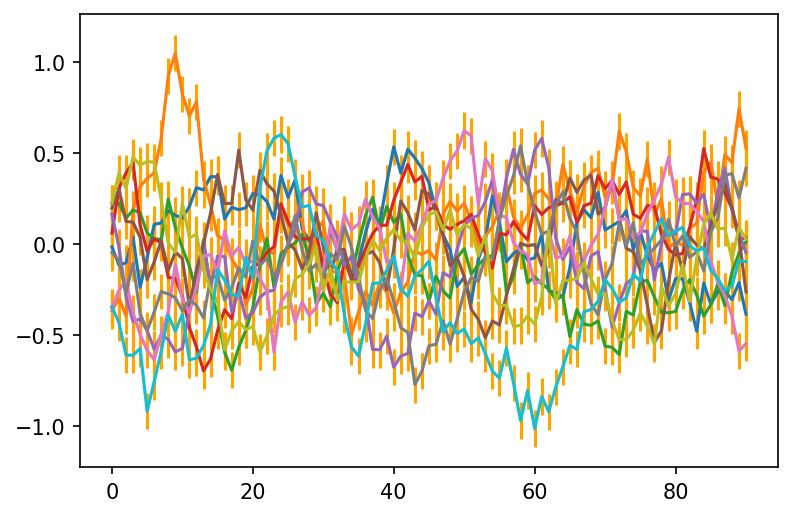

In [21]:
sp = 1

for i,(Ms, Es) in enumerate(result):
#     print(i, end="")
    mean, err = moving_mean_err(Ms, 10**5, stride=10000)
    print(mean.mean())
    plt.errorbar(np.arange(len(mean))[::sp], mean[::sp], yerr=err[::sp], ecolor="orange", label=f"{i}")
# plt.legend()

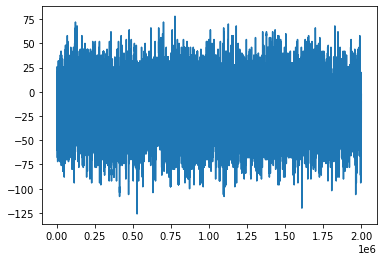

In [10]:
plt.plot(engine.get_sampled_E())

In [6]:
engine.FLIPS

0

In [ ]:
np.